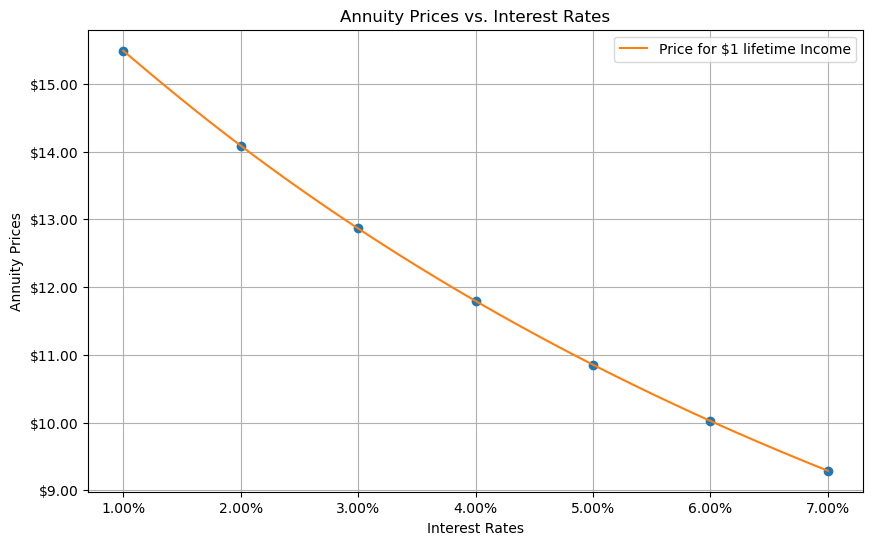

In [2]:
import numpy as np
from scipy.interpolate import CubicSpline
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter


# Define the function to calculate the present value of an annuity
def present_value_annuity(rate, n, mortality_rates):
    present_value = 0
    for t in range(1, n + 1):
        present_value += (1 / (1 + rate) ** t) * mortality_rates[t - 1]
    return present_value

# Define the parameters
years = 20            # Number of years for the annuity
initial_mortality_rate = 0.95  # Initial mortality rate
interest_rates = [0.01,0.02,0.03, 0.04, 0.05, 0.06, 0.07]  # Example interest rates

# Create the mortality rates array
mortality_rates = [initial_mortality_rate]

# Calculate mortality rates for subsequent years
for _ in range(1, years):
    next_rate = mortality_rates[-1] - 0.01  # Decrease by 1%
    mortality_rates.append(max(next_rate, 0))  # Ensure the rate is not negative

# Calculate annuity prices for different interest rates
annuity_prices = [present_value_annuity(rate, years, mortality_rates) for rate in interest_rates]

# Perform cubic spline interpolation
cs = CubicSpline(np.log(interest_rates), annuity_prices)

# Generate more points for smoother curve
x_new = np.linspace(np.log(min(interest_rates)), np.log(max(interest_rates)), 100)
y_new = cs(x_new)
# Define formatter functions
def percent_formatter(x, pos):
    return f'{x:.2%}'

def dollar_formatter(x, pos):
    return f'${x:.2f}'

# Plot the annuity prices against interest rates
plt.figure(figsize=(10, 6))
plt.plot(interest_rates, annuity_prices, 'o')
plt.plot(np.exp(x_new), y_new, label='Price for $1 lifetime Income')  # Transform back to original scale
plt.xlabel('Interest Rates')
plt.ylabel('Annuity Prices')
plt.title('Annuity Prices vs. Interest Rates')
# Format x-axis as percentage
plt.gca().xaxis.set_major_formatter(FuncFormatter(percent_formatter))

# Format y-axis as dollars
plt.gca().yaxis.set_major_formatter(FuncFormatter(dollar_formatter))
plt.legend()
plt.grid(True)
plt.show()
